In [1]:
# Importacion de las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Se importa el dataframe de exportaciones previamente limpiado
df = pd.read_csv(r"/content/drive/MyDrive/Data/soya.csv")

In [4]:
df.shape

(363, 10)

In [5]:
df.columns

Index(['YEAR', 'MONTH', 'PIB_USD_MILL', 'PROD_SOJA_TON', 'COMM_ACEITE_USD_TON',
       'VALOR_FOB_ACEITE', 'KILBRU_ACEITE', 'VALOR_FOB_TORTA', 'KILBRU_TORTA',
       'COMM_HARINA_USD_TON'],
      dtype='object')

In [7]:
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))
df = df.set_index('DATE')
df['KILBRU_ACEITE'] = df['KILBRU_ACEITE'].div(1000)
df['KILBRU_TORTA'] = df['KILBRU_TORTA'].div(1000)
df = df.fillna(0)
df

,YEAR,MONTH,PIB_USD_MILL,PROD_SOJA_TON,COMM_ACEITE_USD_TON,VALOR_FOB_ACEITE,KILBRU_ACEITE,VALOR_FOB_TORTA,KILBRU_TORTA,COMM_HARINA_USD_TON
DATE,,,,,,,,,,
1992-01-01,1992,1,307.670824,0.0000,420.421,304451.00,0.365720,1089250.00,4.657464,175.8
1992-02-01,1992,2,306.133843,0.0000,424.389,430771.00,0.509268,3240782.00,14.997048,174.1
1992-03-01,1992,3,304.517081,0.0000,446.436,646738.00,0.771850,1795147.00,6.022430,178.7
1992-04-01,1992,4,347.020861,257568.2249,430.121,595243.00,0.690990,2976684.00,11.647644,172.9
1992-05-01,1992,5,344.642308,0.0000,454.152,169422.00,0.204610,940598.00,5.608295,183.2
...,...,...,...,...,...,...,...,...,...,...
2021-11-01,2021,11,548.686376,0.0000,1305.901,40984407.67,31.678495,54870921.57,157.040560,348.8
2021-12-01,2021,12,547.891754,0.0000,1216.078,48378799.14,37.251651,52564625.61,151.537593,411.7
2022-01-01,2022,1,497.048641,0.0000,1336.033,46848965.67,36.930825,67724077.75,187.975798,418.9


In [8]:
df_aceite = df.loc[:,['MONTH', 'PIB_USD_MILL', 'COMM_ACEITE_USD_TON',
       'KILBRU_ACEITE', 'VALOR_FOB_ACEITE']]

In [52]:
df_aceite_test = df_aceite['VALOR_FOB_ACEITE'].to_frame()[326:]

In [10]:
#df_torta = df.loc[:,['MONTH', 'PIB_USD_MILL', 'COMM_HARINA_USD_TON',
#                     'KILBRU_TORTA', 'VALOR_FOB_TORTA']]

Text(0.5, 1.0, 'Correlation Heatmap')

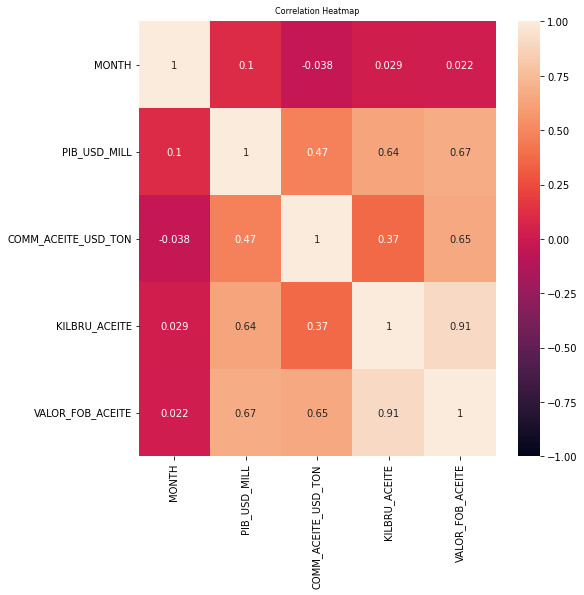

In [11]:
plt.figure(figsize=(8,8))
heatmap = sns.heatmap(df_aceite.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':8}, pad=8)

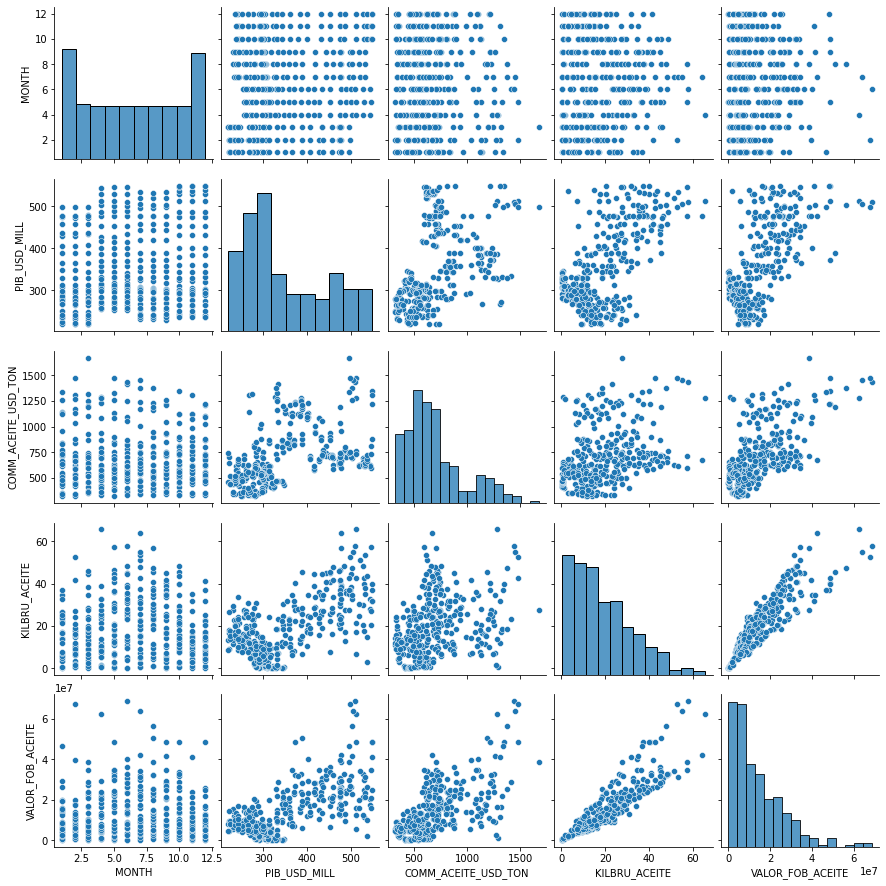

In [12]:
sns.pairplot(df_aceite)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
df_aceite_s = scaler.fit_transform(df_aceite)

In [16]:
scaler.scale_

array([3.46260938e+00, 9.41087910e+01, 2.73852124e+02, 1.38313212e+01,
       1.24648062e+07])

In [17]:
def df_to_X_y(df, window_size=4):
  df_as_np = df#.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][4]
    y.append(label)
  return np.array(X), np.array(y)

In [18]:
X, y = df_to_X_y(df_aceite_s,window_size=3)
X.shape, y.shape

((360, 3, 5), (360,))

In [19]:
X_train, y_train = X[:287], y[:287] # hasta 0.8
X_val, y_val = X[287:323], y[287:323] #0.8 a 0.9
X_test, y_test = X[323:], y[323:] #0.9 para adelante

In [41]:
y_test

array([ 1.17641019,  0.51854542,  1.64394358,  0.25695477,  1.38410813,
        0.76890243,  0.60362729,  0.98393603, -0.96960755, -0.33917596,
        0.11266643,  0.25391615,  0.77876425,  0.76974281,  0.27892489,
        1.14280924,  0.61167339,  0.9281014 ,  0.86892305,  0.56634808,
        0.15863104,  0.87094801,  1.21704448,  2.04383909,  0.80806947,
        3.87155962,  2.7755763 ,  4.38633506,  3.9908685 ,  3.40008982,
        2.20438647,  2.77474984,  2.16426454,  2.75748608,  2.63475385,
        4.30267321,  1.97816224])

In [20]:
import tensorflow as tf
import os
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import *
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import load_model
from sklearn.metrics import *

In [ ]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [21]:
model_1 = Sequential()
model_1.add(InputLayer((3,5)))
model_1.add(LSTM(100, return_sequences=True))
model_1.add(LSTM(50))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(1, 'linear'))
model_1.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 100)            42400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 64)                3264      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 75,929
Trainable params: 75,929
Non-trainable params: 0
_________________________________________________________________


In [22]:
cp_1 = ModelCheckpoint('model_1/', save_best_only=True)

In [23]:
model_1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, verbose=0, callbacks=[cp_1])

In [24]:
model_1 = load_model('model_1/')

In [27]:
def postprocess(arr):
  arr = (arr*scaler.scale_[4]) + scaler.mean_[4]
  return arr

In [25]:
def plot_predictions(model, X, y):
  predictions = model.predict(X).flatten()
  preds = postprocess(predictions)
  actuals= postprocess(y)
  df = pd.DataFrame(data={'Predictions': preds,
                          'Actuals':actuals})
  plt.figure(figsize=(15, 5))
  plt.plot(df['Predictions'])
  plt.plot(df['Actuals'])
  return df

9/9 [==============================] - 0s 4ms/step


,Predictions,Actuals
0,4202881.0,595243.00
1,3911880.0,169422.00
2,3663871.0,271668.00
3,3349885.0,452848.00
4,2911865.0,1075340.00
...,...,...
282,21907432.0,17726192.09
283,18328694.0,21247704.00
284,17087632.0,25616149.06
285,15308716.0,15019500.95


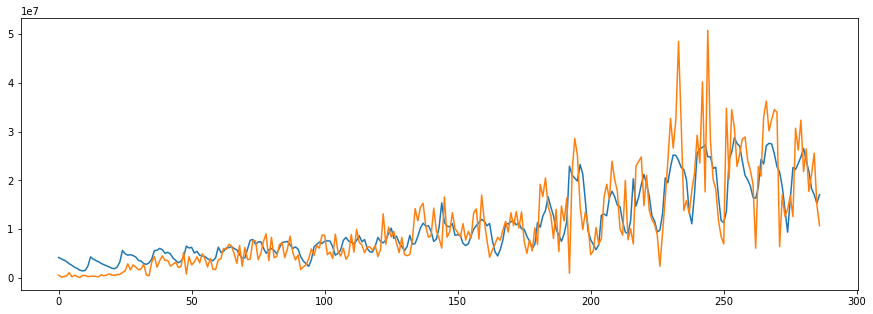

In [28]:
post_processed_df = plot_predictions(model_1, X_train, y_train)
post_processed_df

In [29]:
rmse = np.sqrt(mean_squared_error(post_processed_df['Actuals'], post_processed_df['Predictions']))
print("The root mean squared error is {:.2f}.".format(rmse))

The root mean squared error is 4938677.50.


In [30]:
mape = mean_absolute_percentage_error(post_processed_df['Actuals'], post_processed_df['Predictions'])
print("The Mean absolute percentage error is {:.2f}.".format(mape))

The Mean absolute percentage error is 1.05.


In [31]:
r2 = r2_score(post_processed_df['Actuals'], post_processed_df['Predictions'])
print("The coefficient of determination is {:.2f}.".format(r2))

The coefficient of determination is 0.72.


2/2 [==============================] - 0s 9ms/step


,Predictions,Actuals
0,20117204.0,27539290.55
1,24884380.0,18435928.01
2,25171256.0,24453276.36
3,27370774.0,23198508.32
4,25541632.0,42244118.06
5,25906046.0,38474056.83
6,25892564.0,29208538.92
7,26042188.0,32644790.48
8,23634424.0,9460611.41
9,19472838.0,12838334.55


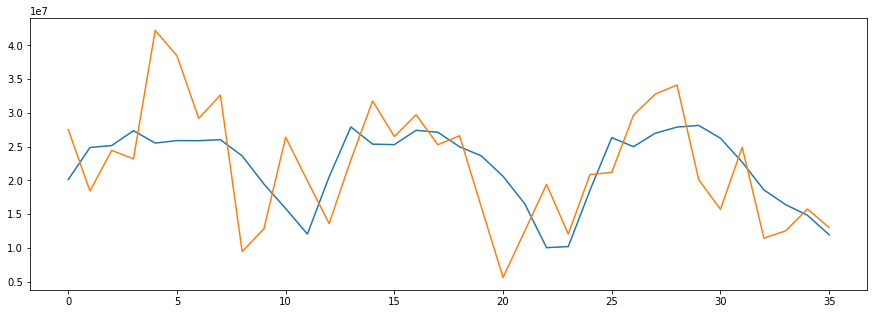

In [32]:
post_processed_df = plot_predictions(model_1, X_val, y_val)
post_processed_df

In [33]:
rmse = np.sqrt(mean_squared_error(post_processed_df['Actuals'], post_processed_df['Predictions']))
print("The root mean squared error is {:.2f}.".format(rmse))

The root mean squared error is 7292927.79.


In [34]:
mape = mean_absolute_percentage_error(post_processed_df['Actuals'], post_processed_df['Predictions'])
print("The Mean absolute percentage error is {:.2f}.".format(mape))

The Mean absolute percentage error is 0.36.


In [35]:
r2 = r2_score(post_processed_df['Actuals'], post_processed_df['Predictions'])
print("The coefficient of determination is {:.2f}.".format(r2))

The coefficient of determination is 0.27.


2/2 [==============================] - 0s 7ms/step


,Predictions,Actuals
0,18312912.0,28670994.64
1,26728876.0,20470837.74
2,26951160.0,34498707.75
3,28973960.0,17210161.06
4,27616792.0,31259909.17
5,27460952.0,23591489.38
6,24152644.0,21531366.82
7,24190168.0,26271841.57
8,21265976.0,1921299.51
9,18001812.0,9779506.98


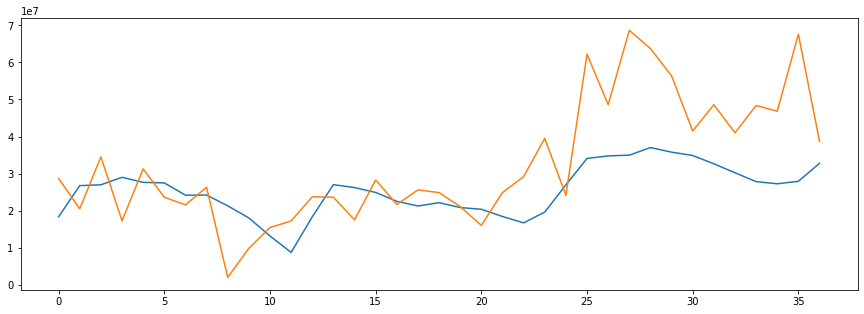

In [53]:
ltsm_predictions = plot_predictions(model_1, X_test, y_test)
df_aceite_test['lstm'] = ltsm_predictions['Predictions'].to_list()
ltsm_predictions

In [103]:
ltsm_rmse = np.sqrt(mean_squared_error(df_aceite_test['VALOR_FOB_ACEITE'], df_aceite_test['lstm']))
print("The root mean squared error is {:.2f}.".format(ltsm_rmse))

The root mean squared error is 14499032.22.


In [104]:
ltsm_mape = mean_absolute_percentage_error(df_aceite_test['VALOR_FOB_ACEITE'], df_aceite_test['lstm'])
print("The Mean absolute percentage error is {:.2f}.".format(ltsm_mape))

The Mean absolute percentage error is 0.56.


In [105]:
ltsm_r2 = r2_score(df_aceite_test['VALOR_FOB_ACEITE'], df_aceite_test['lstm'])
print("The coefficient of determination is {:.2f}.".format(ltsm_r2))

The coefficient of determination is 0.22.


In [55]:
model_2 = Sequential()
model_2.add(InputLayer((3,5)))
model_2.add(Conv1D(100, kernel_size=2, activation='relu'))
model_2.add(Flatten())
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(1, 'linear'))
model_2.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 100)            1100      
                                                                 
 flatten (Flatten)           (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                6432      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7,565
Trainable params: 7,565
Non-trainable params: 0
_________________________________________________________________


In [56]:
cp_2 = ModelCheckpoint('model_2/', save_best_only=True)

In [57]:
model_2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200 , callbacks=[cp_2], verbose=0)

In [58]:
model_2 = load_model('model_2/')

9/9 [==============================] - 0s 2ms/step


,Predictions,Actuals
0,925370.0,595243.00
1,1311400.0,169422.00
2,1149971.0,271668.00
3,295366.0,452848.00
4,-251286.0,1075340.00
...,...,...
282,21477372.0,17726192.09
283,18077124.0,21247704.00
284,16955082.0,25616149.06
285,14953430.0,15019500.95


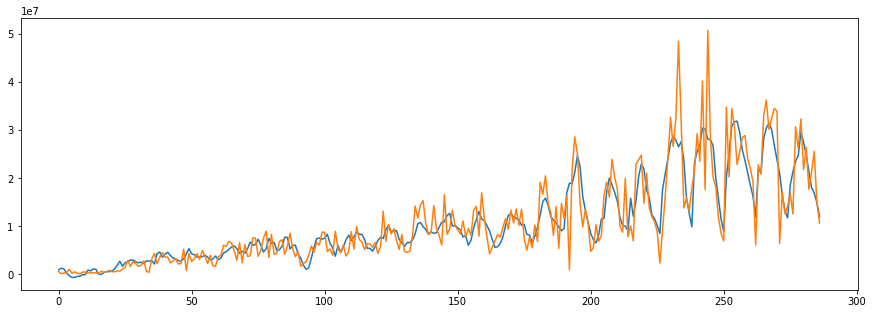

In [59]:
post_processed_df = plot_predictions(model_2, X_train, y_train)
post_processed_df

In [60]:
rmse = np.sqrt(mean_squared_error(post_processed_df['Actuals'], post_processed_df['Predictions']))
print("The root mean squared error is {:.2f}.".format(rmse))

The root mean squared error is 4082295.29.


In [61]:
mape = mean_absolute_percentage_error(post_processed_df['Actuals'], post_processed_df['Predictions'])
print("The Mean absolute percentage error is {:.2f}.".format(mape))

The Mean absolute percentage error is 0.54.


In [62]:
r2 = r2_score(post_processed_df['Actuals'], post_processed_df['Predictions'])
print("The coefficient of determination is {:.2f}.".format(r2))

The coefficient of determination is 0.81.


2/2 [==============================] - 0s 6ms/step


,Predictions,Actuals
0,21342472.0,27539290.55
1,23579872.0,18435928.01
2,29806956.0,24453276.36
3,27956736.0,23198508.32
4,28882816.0,42244118.06
5,26935986.0,38474056.83
6,28438606.0,29208538.92
7,26241800.0,32644790.48
8,23819364.0,9460611.41
9,19368676.0,12838334.55


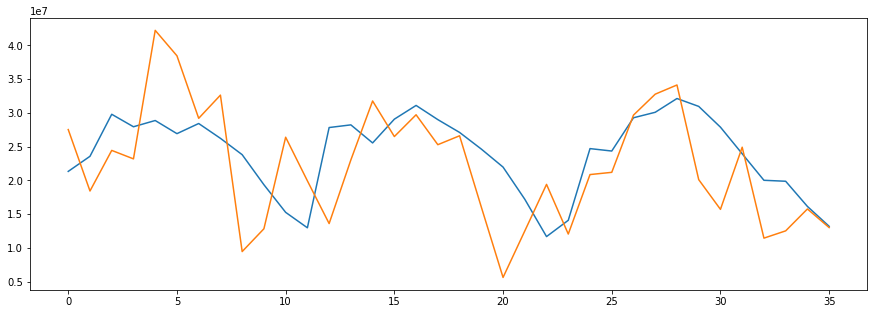

In [63]:
post_processed_df = plot_predictions(model_2, X_val, y_val)
post_processed_df

In [64]:
rmse = np.sqrt(mean_squared_error(post_processed_df['Actuals'], post_processed_df['Predictions']))
print("The root mean squared error is {:.2f}.".format(rmse))

The root mean squared error is 7527003.82.


In [65]:
mape = mean_absolute_percentage_error(post_processed_df['Actuals'], post_processed_df['Predictions'])
print("The Mean absolute percentage error is {:.2f}.".format(mape))

The Mean absolute percentage error is 0.39.


In [66]:
r2 = r2_score(post_processed_df['Actuals'], post_processed_df['Predictions'])
print("The coefficient of determination is {:.2f}.".format(r2))

The coefficient of determination is 0.23.


2/2 [==============================] - 0s 8ms/step


,Predictions,Actuals
0,23085214.0,28670994.64
1,26805108.0,20470837.74
2,31137088.0,34498707.75
3,30564632.0,17210161.06
4,31751584.0,31259909.17
5,28776296.0,23591489.38
6,28251768.0,21531366.82
7,25379534.0,26271841.57
8,22590592.0,1921299.51
9,19428988.0,9779506.98


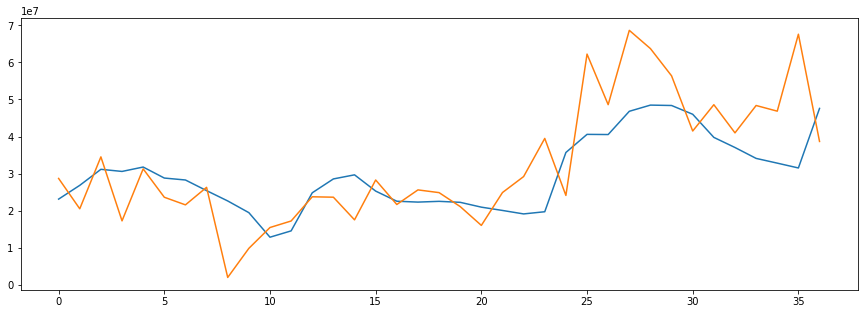

In [68]:
conv1d_predictions = plot_predictions(model_2, X_test, y_test)
df_aceite_test['conv1d'] = conv1d_predictions['Predictions'].to_list()
conv1d_predictions

In [100]:
conv1d_rmse = np.sqrt(mean_squared_error(df_aceite_test['VALOR_FOB_ACEITE'], df_aceite_test['conv1d']))
print("The root mean squared error is {:.2f}.".format(conv1d_rmse))

The root mean squared error is 11575961.27.


In [101]:
conv1d_mape = mean_absolute_percentage_error(df_aceite_test['VALOR_FOB_ACEITE'], df_aceite_test['conv1d'])
print("The Mean absolute percentage error is {:.2f}.".format(conv1d_mape))

The Mean absolute percentage error is 0.55.


In [102]:
conv1d_r2 = r2_score(df_aceite_test['VALOR_FOB_ACEITE'], df_aceite_test['conv1d'])
print("The coefficient of determination is {:.2f}.".format(conv1d_r2))

The coefficient of determination is 0.50.


In [72]:
model_3 = Sequential()
model_3.add(InputLayer((3,5)))
model_3.add(GRU(100))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(1, 'linear'))
model_3.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 100)               32100     
                                                                 
 dense_4 (Dense)             (None, 32)                3232      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 35,365
Trainable params: 35,365
Non-trainable params: 0
_________________________________________________________________


In [73]:
cp_3 = ModelCheckpoint('model_3/', save_best_only=True)

In [74]:
model_3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, callbacks=[cp_3], verbose=0)

In [75]:
model_3 = load_model('model_3/')

9/9 [==============================] - 0s 3ms/step


,Predictions,Actuals
0,1259132.0,595243.00
1,1527383.0,169422.00
2,1213903.0,271668.00
3,804444.0,452848.00
4,379770.0,1075340.00
...,...,...
282,21294224.0,17726192.09
283,18018526.0,21247704.00
284,16942710.0,25616149.06
285,16702438.0,15019500.95


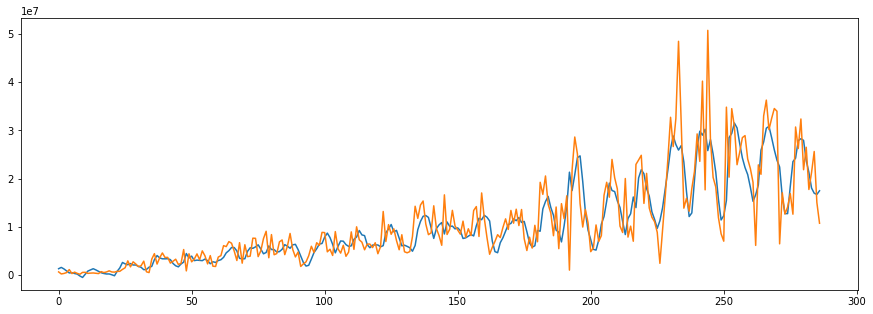

In [76]:
post_processed_df = plot_predictions(model_3, X_train, y_train)
post_processed_df

In [77]:
rmse = np.sqrt(mean_squared_error(post_processed_df['Actuals'], post_processed_df['Predictions']))
print("The root mean squared error is {:.2f}.".format(rmse))

The root mean squared error is 4583111.70.


In [78]:
mape = mean_absolute_percentage_error(post_processed_df['Actuals'], post_processed_df['Predictions'])
print("The Mean absolute percentage error is {:.2f}.".format(mape))

The Mean absolute percentage error is 0.52.


In [79]:
r2 = r2_score(post_processed_df['Actuals'], post_processed_df['Predictions'])
print("The coefficient of determination is {:.2f}.".format(r2))

The coefficient of determination is 0.76.


2/2 [==============================] - 0s 6ms/step


,Predictions,Actuals
0,20505316.0,27539290.55
1,28008812.0,18435928.01
2,28760764.0,24453276.36
3,29514068.0,23198508.32
4,27938706.0,42244118.06
5,29245960.0,38474056.83
6,28873520.0,29208538.92
7,26075092.0,32644790.48
8,23935442.0,9460611.41
9,17897868.0,12838334.55


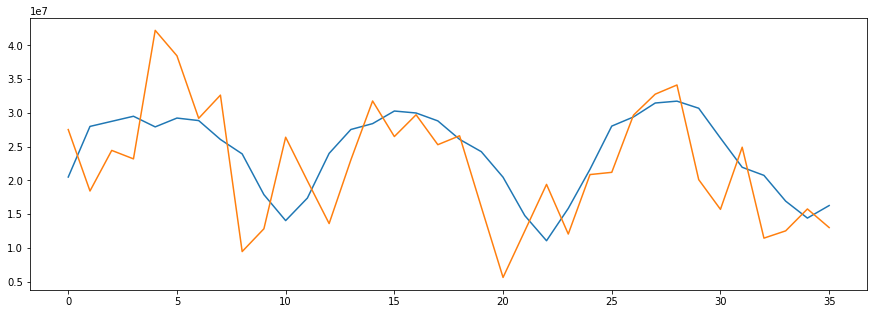

In [80]:
post_processed_df = plot_predictions(model_3, X_val, y_val)
post_processed_df

In [81]:
rmse = np.sqrt(mean_squared_error(post_processed_df['Actuals'], post_processed_df['Predictions']))
print("The root mean squared error is {:.2f}.".format(rmse))

The root mean squared error is 7220657.75.


In [82]:
mape = mean_absolute_percentage_error(post_processed_df['Actuals'], post_processed_df['Predictions'])
print("The Mean absolute percentage error is {:.2f}.".format(mape))

The Mean absolute percentage error is 0.37.


In [83]:
r2 = r2_score(post_processed_df['Actuals'], post_processed_df['Predictions'])
print("The coefficient of determination is {:.2f}.".format(r2))

The coefficient of determination is 0.29.


In [ ]:
gru_predictions = plot_predictions(model_3, X_test, y_test)
df_aceite_test['gru'] = gru_predictions['Predictions'].to_list()
gru_predictions

In [97]:
gru_rmse = np.sqrt(mean_squared_error(df_aceite_test['VALOR_FOB_ACEITE'], df_aceite_test['gru']))
print("The root mean squared error is {:.2f}.".format(gru_rmse))

The root mean squared error is 12226465.19.


In [98]:
gru_mape = mean_absolute_percentage_error(df_aceite_test['VALOR_FOB_ACEITE'], df_aceite_test['gru'])
print("The Mean absolute percentage error is {:.2f}.".format(gru_mape))

The Mean absolute percentage error is 0.56.


In [99]:
gru_r2 = r2_score(df_aceite_test['VALOR_FOB_ACEITE'], df_aceite_test['gru'])
print("The coefficient of determination is {:.2f}.".format(gru_r2))

The coefficient of determination is 0.45.


In [90]:
plt.style.use('fivethirtyeight')

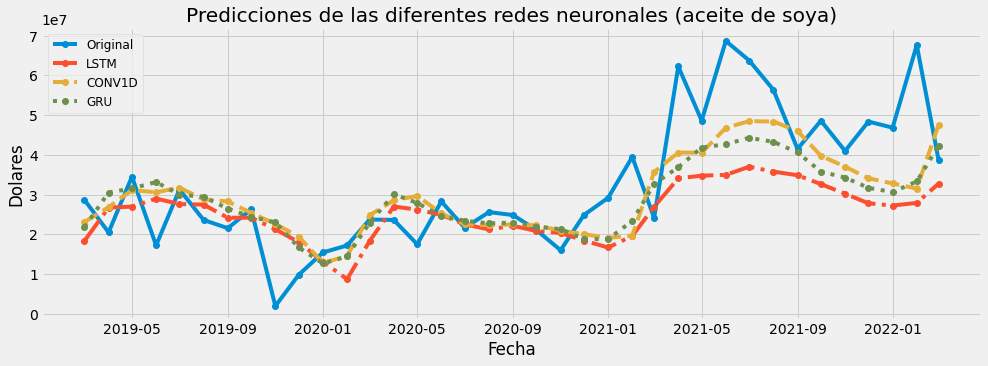

In [108]:
df_aceite_test
fig, axes = plt.subplots(figsize=(15, 5))
axes.plot_date(df_aceite_test.index, df_aceite_test['VALOR_FOB_ACEITE'], label='Original', linestyle='-')
axes.plot_date(df_aceite_test.index, df_aceite_test['lstm'], label='LSTM', linestyle='-.')
axes.plot_date(df_aceite_test.index, df_aceite_test['conv1d'], label='CONV1D', linestyle='--')
axes.plot_date(df_aceite_test.index, df_aceite_test['gru'], label='GRU', linestyle=':')
axes.legend(fontsize=12)
axes.set_xlabel('Fecha')
axes.set_ylabel('Dolares')
plt.title('Predicciones de las diferentes redes neuronales (aceite de soya)')
plt.show()


In [107]:
rmse_errors = [ltsm_rmse, conv1d_rmse, gru_rmse]
mape_errors = [ltsm_mape, conv1d_mape, gru_mape]
r2_errors = [ltsm_r2, conv1d_r2, gru_r2]
errors = pd.DataFrame({'Models': ['LTSM', 'CONV1D', 'GRU'], 'RMSE Errors': rmse_errors, 'MAPE Errors': mape_errors, 'R2 Errors': r2_errors})
errors

,Models,RMSE Errors,MAPE Errors,R2 Errors
0,LTSM,1.449903e+07,0.563708,0.220365
1,CONV1D,1.157596e+07,0.545921,0.503033
2,GRU,1.222647e+07,0.556696,0.445610


In [109]:
rmse_errors = np.round([ltsm_rmse, conv1d_rmse, gru_rmse], 3)
mape_errors = np.round([ltsm_mape, conv1d_mape, gru_mape], 3)
r2_errors = np.round([ltsm_r2, conv1d_r2, gru_r2], 3)
errors = pd.DataFrame({'Modelos': ['LTSM', 'CONV1D', 'GRU'], 'RMSE Errors': rmse_errors, 'MAPE Errors': mape_errors, 'R2 Errors': r2_errors})
errors

,Modelos,RMSE Errors,MAPE Errors,R2 Errors
0,LTSM,1.449903e+07,0.564,0.220
1,CONV1D,1.157596e+07,0.546,0.503
2,GRU,1.222647e+07,0.557,0.446


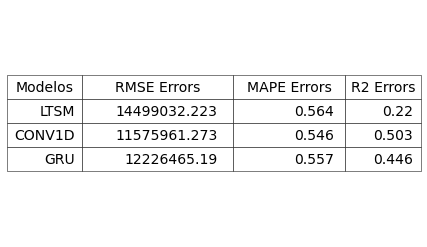

In [110]:
fig, ax = plt.subplots() 
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
table = ax.table(cellText=errors.values, 
                      #rowLabels=rows, 
                      #rowColours=colors, 
                      colLabels=errors.columns, 
                      loc='center', 
                 colWidths=[0.2, 0.4, 0.3, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 2)
plt.show() 